In [36]:
# allow imports from src
import sys

sys.path.append("..")

In [37]:
# autoreload code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Roof Image Scraping from Satellite Images

Finding bounding boxes for houses with obstructions (trees) is complicated. Let's just use Google's satellite + street view images for gold label of houses. We'll find bounding boxes from the street image and overlay them on the satellite images.

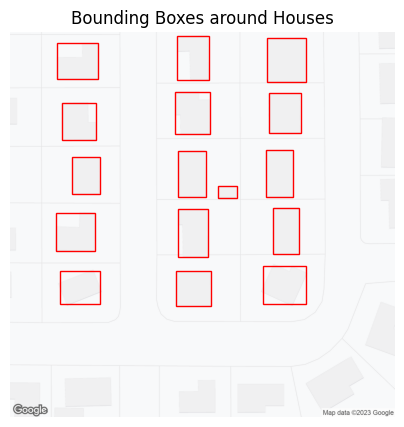

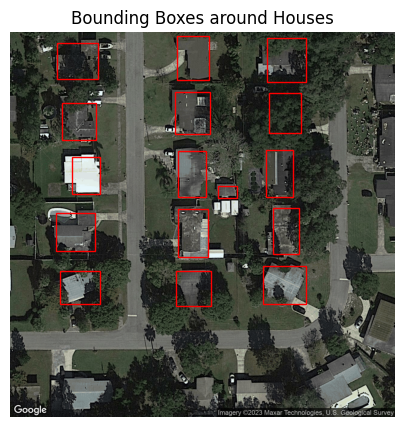

In [38]:
import os
from src.bounding_boxes import find_roof_boxes, load_image, display_bounding_boxes

data_dir = "data"


# load test images
test_satellite_map = os.path.join("..", data_dir, "sat_19.png")
test_street_map = os.path.join("..", data_dir, "street_19.png")


image, boxes = find_roof_boxes(test_street_map)
satellite_image = load_image(test_satellite_map)

display_bounding_boxes(image, boxes)
display_bounding_boxes(satellite_image, boxes)

In [39]:
from src.postprocessing import crop_image

roof_images = [crop_image(satellite_image, *box, buffer=30) for box in boxes]

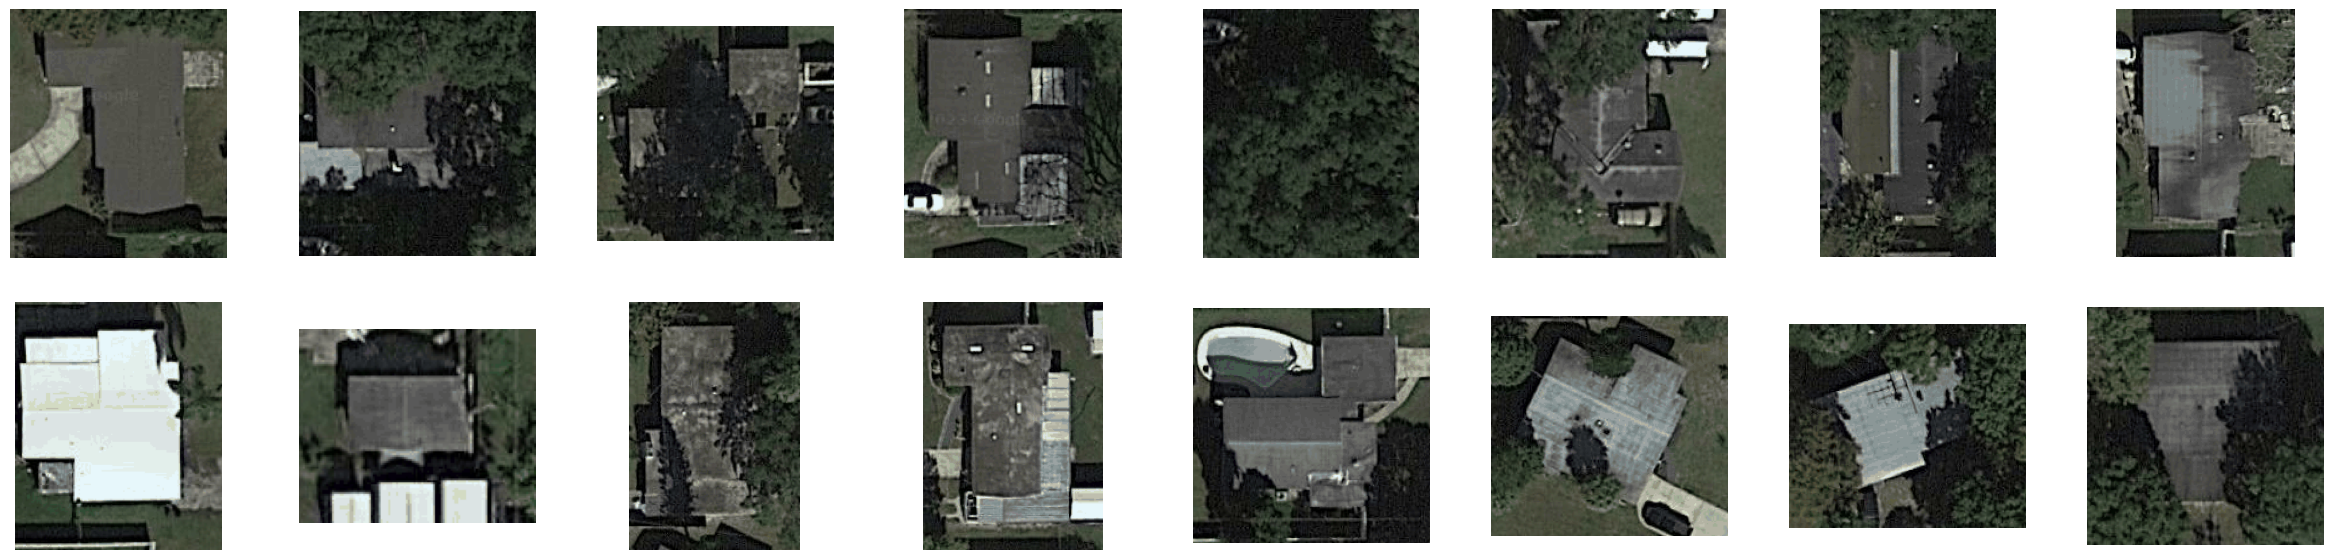

In [42]:
from src.utils import display_multiple_images

display_multiple_images(roof_images, n_cols=8)

In [41]:
from skimage import io
from src.postprocessing import save_images

save_images(
    filesystem=io,
    images=roof_images,
    directory=os.path.join("..", data_dir, "roof_images"),
    parent_filename="satellite_map",
)